# Traffic Signs Recognition

## Import datasets from Kaggle

In [7]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"","key":""}'}

In [8]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [9]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 96% 589M/612M [00:02<00:00, 226MB/s]
100% 612M/612M [00:03<00:00, 210MB/s]


In [11]:
!ls

gtsrb-german-traffic-sign.zip  kaggle.json  sample_data


In [13]:
file_name = "gtsrb-german-traffic-sign.zip"

# opening the zip file in read me mode
with ZipFile(file_name, 'r') as zip :
  print("Extracting the files...")
  zip.extractall()
  print("Done")

Extracting the files...
Done


In [14]:
!ls

gtsrb-german-traffic-sign.zip  meta  Meta.csv	  test	Test.csv  Train
kaggle.json		       Meta  sample_data  Test	train	  Train.csv


## Importing libraries

In [15]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

%matplotlib inline

In [16]:
import pandas as pd
df=pd.read_csv('/content/Meta.csv')
df.head()



,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


In [20]:
dir_path = '/content/Train'
os.listdir(dir_path)

['11',
 '37',
 '30',
 '22',
 '25',
 '35',
 '19',
 '5',
 '8',
 '13',
 '26',
 '41',
 '23',
 '1',
 '15',
 '27',
 '20',
 '34',
 '28',
 '31',
 '0',
 '10',
 '7',
 '12',
 '14',
 '2',
 '17',
 '16',
 '36',
 '24',
 '9',
 '21',
 '39',
 '42',
 '32',
 '38',
 '33',
 '3',
 '18',
 '4',
 '40',
 '6',
 '29']

In [21]:
#Assigning the path for train and test images

train_path = '/content/Train'
test_path = '/content/Test'

print(sorted(os.listdir(train_path)))

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


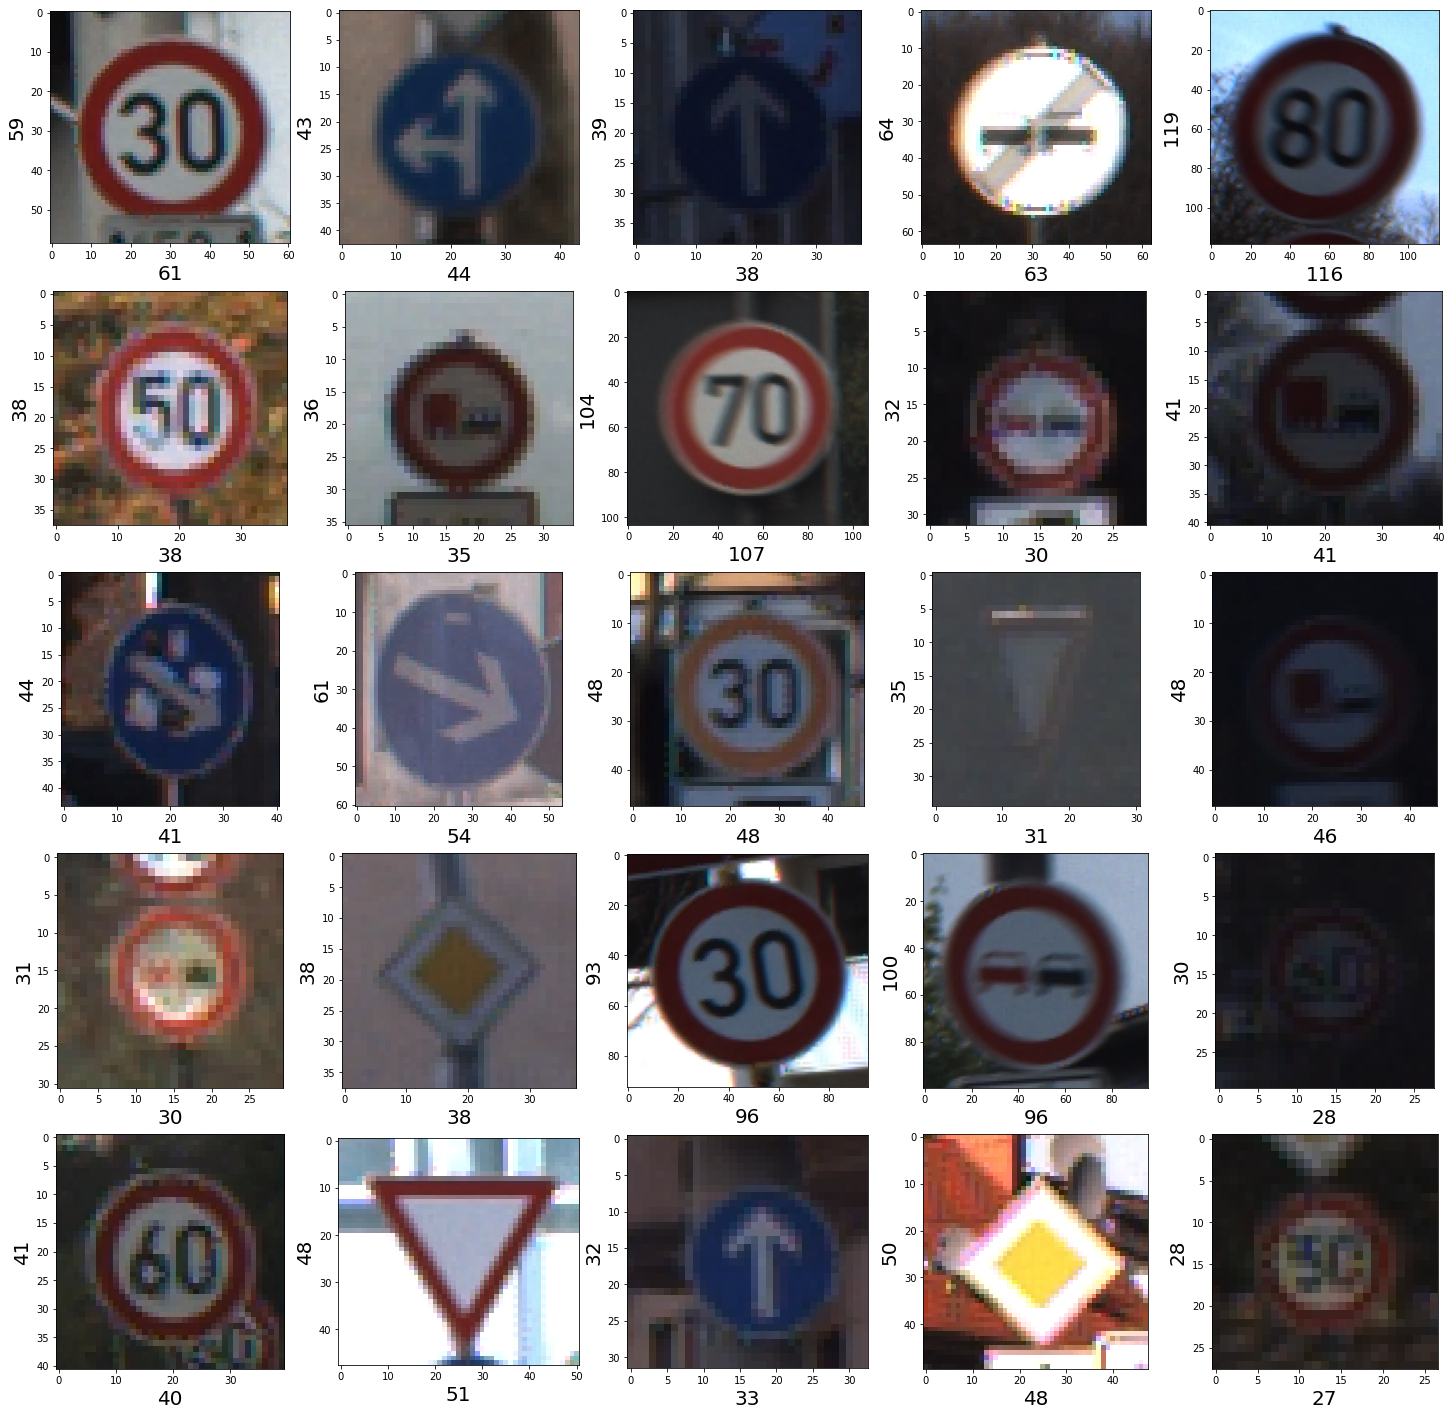

In [22]:
import random
from matplotlib.image import imread

images_path = os.listdir(test_path)

plt.figure(figsize=(25,25))


for i in range(1,26):
    
    plt.subplot(5,5,i)
    random_img_path = test_path +'/'+ random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [23]:
dim1 = []
dim2 = []

for i in range(0,43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


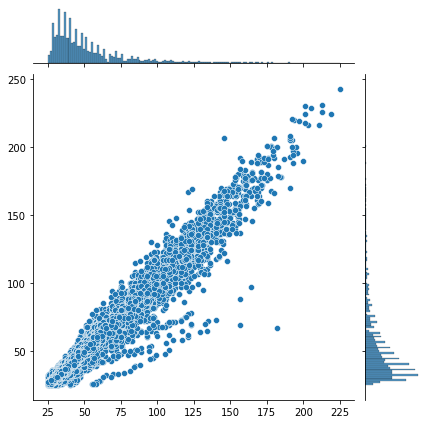

In [24]:
import seaborn as sns
sns.jointplot(dim1,dim2)
plt.show()

In [25]:
image_shape = (50,50)
from PIL import Image

images = []
label_id = []

for i in range(43):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [26]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255 

In [27]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [28]:
images.shape

(39209, 50, 50, 3)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


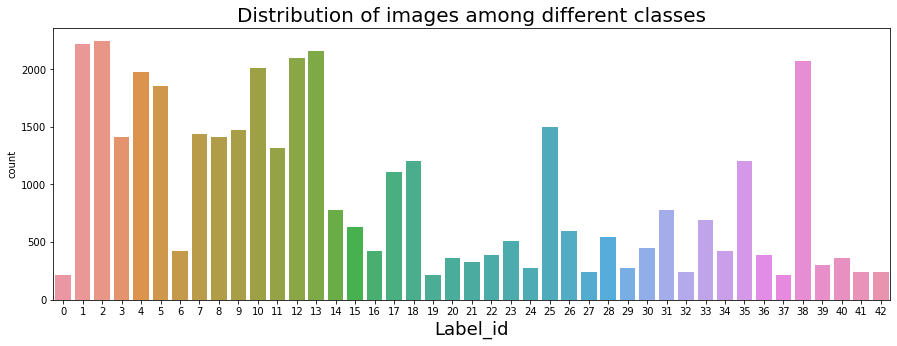

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize = 20)
plt.xlabel('Label_id', fontsize=18)
plt.show()

In [30]:
#Saving the scaled images and labels for future use
np.save('Training_set', images)
np.save('Label_Id', label_id)

In [31]:
images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

In [32]:
#Splitting the data
from sklearn.model_selection import  train_test_split
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [33]:

#keras has a built-in function for one-hot encoding.
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)


## Training the Model

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

model = Sequential()

#1st layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#2nd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#3rd layer
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(43, activation = 'softmax'))


In [35]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)         

In [37]:

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)

model.fit(
    
    x_train, y_train,
    epochs = 25,
    batch_size = 64,
    validation_data = (x_val, y_val),
    callbacks = [early_stopping],
    verbose = 2

)


Epoch 1/25
491/491 - 12s - loss: 2.7581 - accuracy: 0.2368 - val_loss: 1.5749 - val_accuracy: 0.5282
Epoch 2/25
491/491 - 4s - loss: 1.4631 - accuracy: 0.5270 - val_loss: 0.7729 - val_accuracy: 0.8063
Epoch 3/25
491/491 - 4s - loss: 0.9055 - accuracy: 0.7035 - val_loss: 0.3582 - val_accuracy: 0.9075
Epoch 4/25
491/491 - 4s - loss: 0.6417 - accuracy: 0.7876 - val_loss: 0.2438 - val_accuracy: 0.9429
Epoch 5/25
491/491 - 4s - loss: 0.5085 - accuracy: 0.8347 - val_loss: 0.1792 - val_accuracy: 0.9633
Epoch 6/25
491/491 - 4s - loss: 0.4258 - accuracy: 0.8643 - val_loss: 0.1357 - val_accuracy: 0.9675
Epoch 7/25
491/491 - 4s - loss: 0.3765 - accuracy: 0.8788 - val_loss: 0.1057 - val_accuracy: 0.9772
Epoch 8/25
491/491 - 4s - loss: 0.3306 - accuracy: 0.8931 - val_loss: 0.0951 - val_accuracy: 0.9772
Epoch 9/25
491/491 - 4s - loss: 0.3012 - accuracy: 0.9008 - val_loss: 0.0775 - val_accuracy: 0.9837
Epoch 10/25
491/491 - 4s - loss: 0.2852 - accuracy: 0.9087 - val_loss: 0.0718 - val_accuracy: 0.986

## Saving the Model

In [38]:
#Saving the model
model.save('Model.h5')

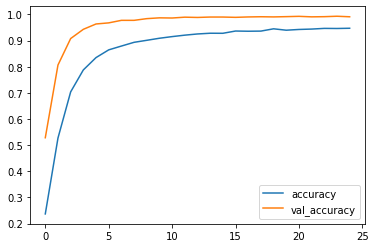

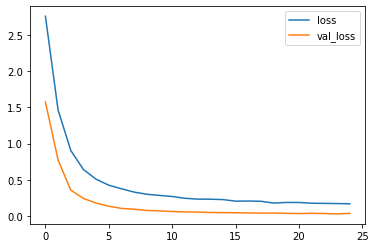

In [39]:
evaluation = pd.DataFrame(model.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()